# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import probplot
from scipy.stats.mstats import zscore
import statsmodels.stats.api as sms
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [56]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## Q1: Is the distribution of body temperatures normal?

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


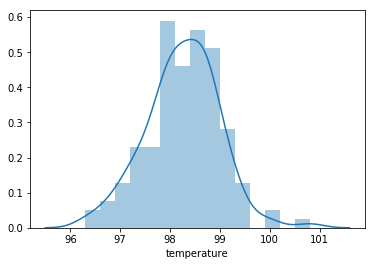

In [57]:
_=sns.distplot(df['temperature'], bins=15)
# Here, if you use '_' , you can avoid printing the pointer.

It looks like the body temperature distribution is normal and unimodal.

## Q2: Is the sample size large? Are the observations independent?

In [58]:
df.temperature.size

130

If we assume that our Std deviation is .5 and Margin of error is +/- 5% , the z score corresponding to 95% Std deviation as 1.96 and world population as 7.6 billion,  by using the below formula we can say our sample size of 130 is insufficient as we would need 390 samples.

Necessary Sample Size = (Z-score)2 * StdDev*(1-StdDev) / (margin of error)2

But the rule of thumb says, we require at least 30 samples to satisfy the CLT conditions. Since our sample size is much larger than 30, we can safely say that the sample size is large enough.

Also, the observations are that of temperature and heart rate of a particular person. It can be safely assumed that the measurements of temperature and heartbeat for one person is not affected by the measurements of another person. Furthermore, we have already discovered that the sampled distrbution is normal and this leads us to conclude that the distribution is a good representation of the population.

## Q3: Is the true population mean really 98.6 degrees F?
    1) Would you use a one-sample or two-sample test? Why?
    2) In this situation, is it appropriate to use the t or z statistic?
    3) Now try using the other test. How is the result be different? Why?

We do not have data about the true population mean as it is not possible to sample the entire population. However, we can perform a hypothesis test and calculate the appropriate p-value for the test. If it is below a threshold (say, p= 0.05), we can reject the hypothesis and if it is greater, we can accept it.

For the purpose of this test, we define: <br>
   - Null Hypothesis: The true population mean is 98.6 degrees F. <br>
   - Alternate Hypothesis: The true population mean is not 98.6 degrees F.

Let's assume null Hypothesis (H0) is true, it follows that the sample distribution mean is the same as the true population mean.

In [59]:
true_mean = 98.6
sample_mean = df['temperature'].mean()
sample_std = df['temperature'].std()
# Now calculating, standard error of the mean i.e. how far the sample mean of the data is likely to be from the true population mean.
# We need the below value for the z-test.
sigma_x = sample_std/np.sqrt(len(df))
print(len(df))

print("sample mean: %s" %sample_mean)
print("sample std: %s" %sample_std)
print("sigma x: %s" %sigma_x)

130
sample mean: 98.24923076923075
sample std: 0.7331831580389456
sigma x: 0.06430441683789102


We have now obtained the values of the sample mean, the sample standard deviation and the sigma_x. The next step is to check how many standard deviations away is 98.6 (true mean) from 98.25 (sample mean).

In [60]:
z = (sample_mean - true_mean) / sigma_x
z

-5.4548232923645195

In [61]:
# Calculating p value where cdf stands for cumulative distribution function
p = (1-stats.norm.cdf(np.abs(z)))*2
p

4.902157013653152e-08

The p-value obtained is extremely small. If the null hypothesis was indeed true, the p-value would have been much greater. We can thus safely disregard the null hypothesis.

The true population mean is NOT 98.6F.

We used the one-sample test for this problem. This is because we were comparing the sample mean to a known value (98.6) and trying to find out if the true mean temperature of humans is actually 98.6F or not. Two-sample hypothesis testing is a statistical analysis designed to test if there is a difference between two means from two different populations. For example, a two-sample hypothesis could be used to test if there is a difference in the mean salary between male and female doctors in the New York City area.

In this situation, it is more appropriate to use z-statistic because the sample size is greater than 30, thus satisfying the conditions for applying Central Limit Theorem.

#### Conclusions:

 1) The p-value is extremely small. Therefore, we can reject the null hypothesis.<br>
 2) The sample size is greater than 30. Hence, using the z-statistic is more appropriate. <br>
 3) We are comparing the sample mean to known value of population mean. Hence, the one sample test is more appropriate. <br>
 4) We are interested in knowing if the p-value on both sides of the tail. Therefore, we use the two-tailed test. <br>



Applying T-Statistic
In the previous section, we noted that the Z-Statistic is the more appropriate test to use in lieu of the sample size. In this section, we will apply the t-statistic to see if our results still hold and compare the p-values obtained in both the cases.


In [62]:
t = z
t

-5.4548232923645195

In [63]:
(1 - stats.t.cdf(np.abs(t), len(df)-1))*2

2.4106320428707306e-07

The p-value obtained by applying the t-statistic is also extremely small. Hence, the null hypothesis is rejected even in this case and all the conclusions arrived at using z-statistics hold.

The result is the same because for sample sizes greater than 30, the z-statistic and the t-statistic yield approximately the same results.
Conclusions:

 1) The p-value for the t-statistic is ten times larger than the p-value of the z-statisitc.<br>
 2) However, it is still extremely small. Therefore, we can safely reject the null hypothesis. <br>
 3) All the conclusions arrived at with z-statistics also hold with the t-statistics. <br>



## Q4: Draw a small sample of size 10 from the data and repeat both tests.
    1) Which one is the correct one to use?
    2) What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?

In [64]:
sample = df.sample(10)
sample.head()

,temperature,gender,heart_rate
50,98.9,F,76.0
76,98.0,F,76.0
99,98.0,M,74.0
51,98.3,F,80.0
87,98.0,M,78.0


In [65]:
true_mean = 98.6
s1_mean = sample['temperature'].mean()
s1_std = sample['temperature'].std()
# Now calculating, standard error of the mean i.e. how far the sample mean of the data is likely to be from the true population mean.
# We need the below value for the t-test.
sigma_x_1 = s1_std/np.sqrt(len(sample))

print("sample 1 mean: %s" %s1_mean)
print("sample 1 std: %s" %s1_std)
print("sigma x 1: %s" %sigma_x_1)

sample 1 mean: 98.32000000000001
sample 1 std: 0.6844300142778986
sigma x 1: 0.21643577440997236


In [66]:
t1 = (s1_mean - true_mean) / sigma_x_1
t1

-1.293686317630704

In [67]:
# Calculating p value where cdf stands for cumulative distribution function
p1 = (1 - stats.t.cdf(np.abs(t1), len(sample)-1))*2
p1

0.22798690283765755

In [68]:
z1 = t1

p2 = (1-stats.norm.cdf(np.abs(z1)))*2
p2

0.1957737933224788

For smaller sample size such as 10, t-test is better suited. As the sample size is less than 30, we cannot do a z-test as we do not know the standard deviation of the population which is required to calculate the z-test. Earlier our sample size was greater than 30 so as per CLT it was okay to assume that the standard deviation of the sample will be same as the standard deviation of the population. But if we plug in the numbers in the formula, we would see the p value is almost the same in both cases.

## Q5: At what temperature should we consider someone's temperature to be "abnormal"?
    1) Start by computing the margin of error and confidence interval.

Let us first calculate the true mean of human temperature with a confidence interval of 95%. Since, we've already calculated the sample mean, sample standard deviation and sigma_x, this step should be fairly straightforward.

In [81]:
# z_critical = stats.norm.ppf(q = 0.975) #q = confidence interval of 95%
z0 = stats.norm.ppf(0.975)
margin_of_error = z0*sigma_x

upper_temp = sample_mean + margin_of_error
lower_temp = sample_mean - margin_of_error

print("margin of error: %s" %margin_of_error)
print("lower temp: %s" %lower_temp)
print("upper temp: %s" %upper_temp)

margin of error: 0.12603434104911743
lower temp: 98.12319642818163
upper temp: 98.37526511027987


From the above results, we are 95% confident that the true mean is somewhere between 98.123F and 98.375F. The margin of error is 13%. Therefore, we can consider any temperature outside this range to be abnormal.
Conclusion : A body temperature below 98.123 and above 98.375 should be considered abnormal.


## Is there a significant difference between males and females in normal temperature?
    1) What test did you use and why?
    2) Write a story with your conclusion in the context of the original problem.

In [82]:
df_male = df[df['gender'] == 'M']
df_female = df[df['gender'] == 'F']

len(df_male), len(df_female)

(65, 65)

We have partitioned our dataframe into two separate dataframes based on gender. Each child dataframe consists of 65 samples each. Since the sample sizes for both dataframes are greater than 30, this implies Central Limit Theorem holds and we can apply z-statistics.

In [83]:
male_temps = df_male['temperature']
female_temps = df_female['temperature']

In [86]:
male_mean = male_temps.mean()
male_std = male_temps.std()

print("male temperature mean: %s" %male_mean)
print("male temperature standard deiviation: %s" %male_std)

male temperature mean: 98.10461538461537
male temperature standard deiviation: 0.698755762326591


In [87]:
female_mean = female_temps.mean()
female_std = female_temps.std()
 
print("female temperature mean: %s" %female_mean)
print("female temperature standard deiviation: %s" %female_std)

female temperature mean: 98.39384615384614
female temperature standard deiviation: 0.7434877527313664


From the above calculations, it can be seen that the mean and the standard deviations of male and female temperatures differ slightly. The next step is to determine if this difference is a statistically significant one.

For hypothesis testing, the following are defined:

    Null Hypothesis: The true mean temperature for men and women are the same.
    Alternate Hypothesis: The true mean temperature for men and women are not the same.

The threshold value of $\alpha$ is assumed to be 0.05. Assuming Null Hypothesis is true.


In [92]:
h0_mean = 0
mean_diff = female_mean - male_mean
sigma_diff = np.sqrt((female_std**2)/len(female_temps)  + (male_std**2)/len(male_temps))
mean_diff, sigma_diff

(0.2892307692307696, 0.03150443755725218)

In [89]:
z = (mean_diff - h0_mean) / sigma_diff
z

2.2854345381656103

In [90]:
p = (1-stats.norm.cdf(z))*2
p

0.022287360760657515

The p-value obtained in this case is 0.02 which is less than the accepted threshold of 0.05.

Therefore, we have to reject the null hypothesis and accept the alternate hypothesis. In other words, there is a significant difference in male and female body temperatures.

For this test, two-sample test was used as we were trying to compare the means of two different groups. Also, the z-statistic was used as the sample sizes for both groups were greater than 30.
Conclusions

    The distribution of human temperatures is normal and can be modeled as a Gaussian distribution.
    The human temperatures are statistically independent.
    We are reasonably confident that the mean temperature of the human body is not 98.6F. This is done by hypothesis testing and calculating the corresponding z-statistic.
    The z-statistic and t-statsitic yield similar results for sample sizes greater than 30.
    Male and female body temperatures differ significantly to be of statistical importance.